In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import pandas_profiling
%matplotlib inline

In [3]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv", index_col=0)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [6]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


## Correlation between users rating and review text length

In [7]:
df['Review Text'] = df['Review Text'].astype(str)
df['Review Length'] = df['Review Text'].apply(len)

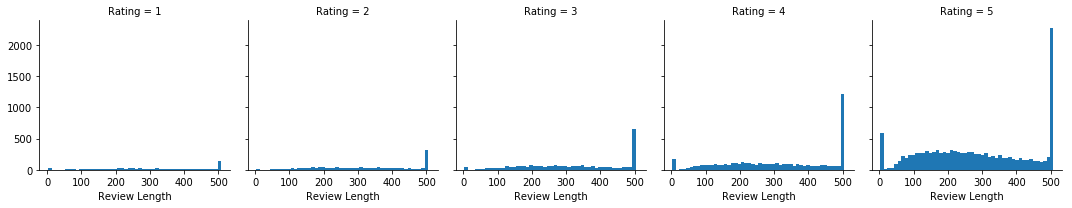

In [8]:
g = sns.FacetGrid(data=df, col = 'Rating')
g.map(plt.hist, 'Review Length', bins=50)

From the above chart, we can say that the users gave 5 rating oftenly. Infact, there are less no of users who gave rating 1 and 2.

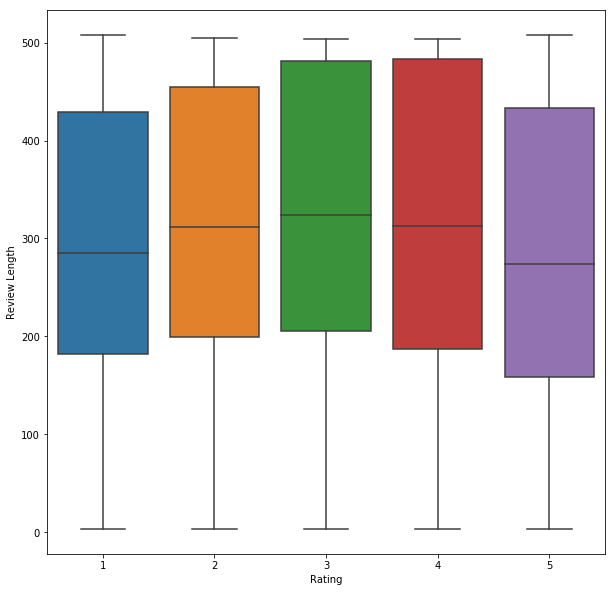

In [9]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'Rating', y='Review Length', data=df)

From the above boxplot, we can conclude that the rating 3 and 4 have more lenth in review.

In [10]:
rating = df.groupby('Rating').mean()
rating.corr()

,Clothing ID,Age,Recommended IND,Positive Feedback Count,Review Length
Clothing ID,1.000000,-0.977686,-0.303355,0.378828,0.975037
Age,-0.977686,1.000000,0.115681,-0.194958,-0.930949
Recommended IND,-0.303355,0.115681,1.000000,-0.987748,-0.307808
Positive Feedback Count,0.378828,-0.194958,-0.987748,1.000000,0.384312
Review Length,0.975037,-0.930949,-0.307808,0.384312,1.000000


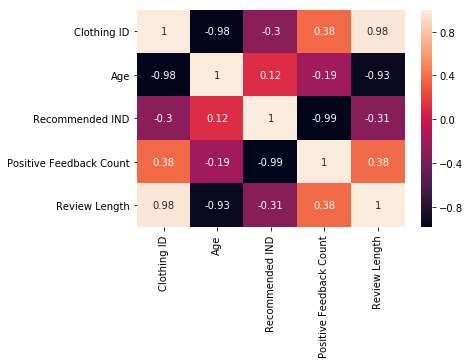

In [13]:
sns.heatmap(data=rating.corr(), annot=True)

The above correlation map shows that there is not much correlation among the column. The columns like review length and positive feedback count are slightly correlated. And, the number 0.93 in negative inidicates that it is nowhere correlated with Review Length. As the Age grows the length of review decreases.

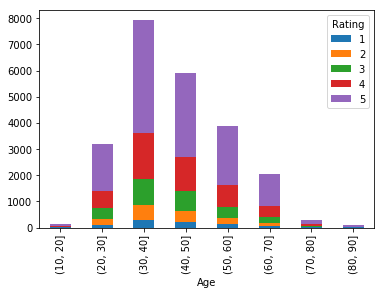

In [16]:
df.groupby(['Rating', pd.cut(df['Age'], np.arange(0,100,10))])\
            .size().unstack(0).plot.bar(stacked=True)

From the above barplot, we can say that the age group 10-20 gave less rating. It is obvious. In this age group teenagers generally don't care about online shopping and reviews. The age group 30-40 gave more 5 rating as compared to all the other age groups. In fact, this is the age group who gave most of the reviews and ratings. And similarly, the age group above 70 did not care about the online shopping stuff.

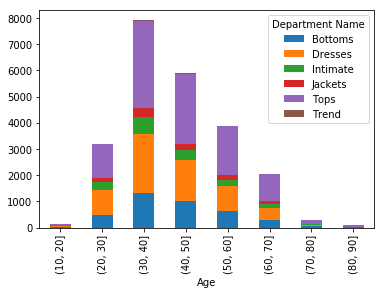

In [21]:
plt.figure(figsize=(15,15))
df.groupby(['Department Name', pd.cut(df['Age'], 
                                      np.arange(0,100,10))])\
                    .size().unstack(0).plot.bar(stacked=True)

In the above barplot, I want to concentrate on the department and the age group. The females from 20-70 age were more active and bought the stuff online. From the above barplot, we can conclude that the females were more focussed on Tops and Dressess department. And, somewhat focussed on Bottoms too but not that much. They were less concentrated on Trend department.

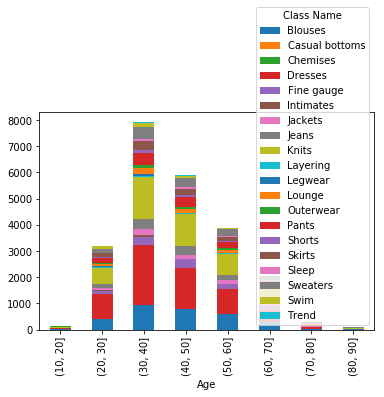

In [26]:
plt.figure(figsize = (45,25))
df.groupby(['Class Name', pd.cut(df['Age'], 
                                 np.arange(0, 100, 10))])\
                .size().unstack(0).plot.bar(stacked=True)

Text(0.5,1,'Counts vs Department')

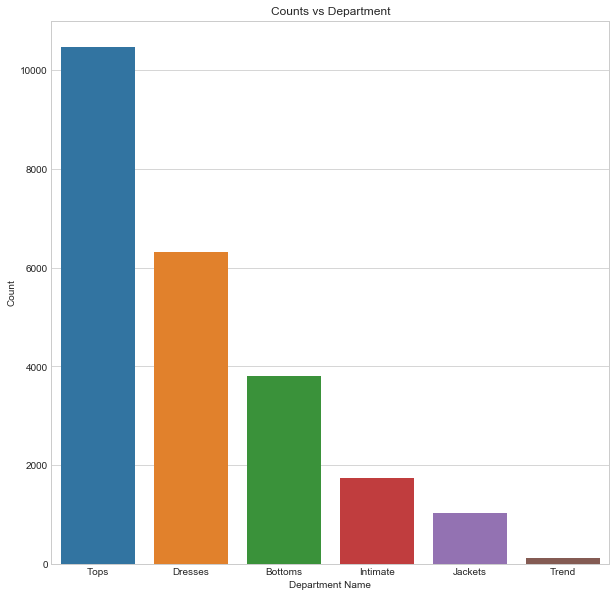

In [36]:
z=df.groupby(by=['Department Name'], as_index=False)\
    .count().sort_values(by='Class Name', ascending=False)
    
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=z['Department Name'], y=z['Class Name'], data=z)
plt.xlabel("Department Name")
plt.ylabel("Count")
plt.title("Counts vs Department")

The above barplot shows that there are maximum entries for Top which is around 10500. And, then the Dresses department is having around 6000 entries

Text(0.5,1,'Counts Vs Division Name')

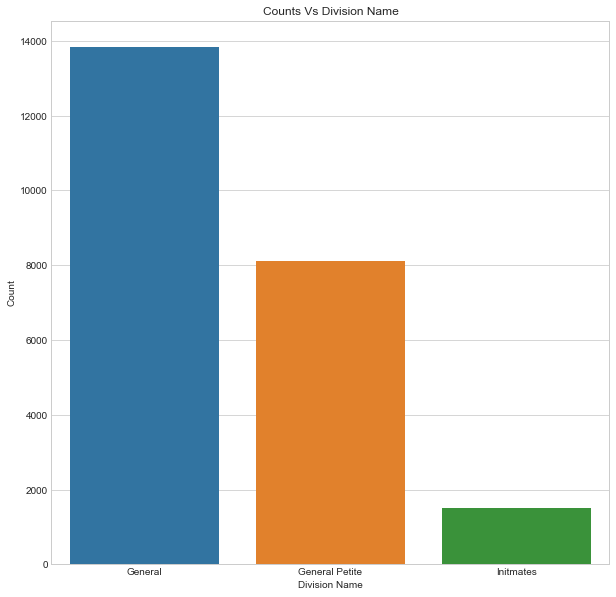

In [37]:
w=df.groupby(by=['Division Name'],as_index=False).count().sort_values(by='Class Name',ascending=False)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=w['Division Name'],y=w['Class Name'], data=w)
plt.xlabel("Division Name")
plt.ylabel("Count")
plt.title("Counts Vs Division Name")

In our dataset, there are 3 divisions which are General, General Petite, and Intimates. The General Division producs were more sold out as compared to General Petite and Intimates. There were around 14K producs were sold in General division, 8K products in General Petite division and around 1600 products were sold in Initmates division.

In [39]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kratisaxena/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [41]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
import re

In [42]:
top_N = 100
a = df['Review Text'].str.lower().str.cat(sep=' ')

# remove punctuation, numbers and returns list of words
b = re.sub('[]')

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types